In [18]:
%matplotlib inline
from pathlib import Path
from sklearn import tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy import stats
import numpy as np
import json

In [19]:
filePath_walk = Path("./../DecisionTreeClassifier/Data/surada_walking_10.json")
filePath_run = Path("./../DecisionTreeClassifier/Data/surada_running_10.json")
f = open(filePath_walk)
f_run = open(filePath_run)
line = f.readline()
line_run = f_run.readline()
running_json = json.loads(line_run)
walking_json = json.loads(line)
x_walk = walking_json['xAxis']
y_walk = walking_json['yAxis']
z_walk = walking_json['zAxis']
x_run = running_json['xAxis']
y_run = running_json['yAxis']
z_run = running_json['zAxis']

In [20]:
x_kswalk = stats.kstest(x_walk, 'norm')
y_kswalk = stats.kstest(y_walk, 'norm')
z_kswalk = stats.kstest(z_walk, 'norm')

In [21]:
x_kswalk

KstestResult(statistic=0.12616951523215136, pvalue=1.5052580293328788e-08)

In [22]:
y_kswalk

KstestResult(statistic=0.94862298011537638, pvalue=0.0)

In [23]:
z_kswalk

KstestResult(statistic=0.99999996155595661, pvalue=0.0)

In [24]:
x_ksrun = stats.kstest(x_run, 'norm')
y_ksrun = stats.kstest(y_run, 'norm')
z_ksrun = stats.kstest(z_run, 'norm')

In [25]:
x_ksrun

KstestResult(statistic=0.24717740770457636, pvalue=0.0)

In [26]:
y_ksrun

KstestResult(statistic=0.65795225220628384, pvalue=0.0)

In [27]:
z_ksrun

KstestResult(statistic=0.97796180299629354, pvalue=0.0)

In [28]:
from scipy.stats import ks_2samp

ks_2samp(x_walk,x_run)

Ks_2sampResult(statistic=0.31657055349730356, pvalue=7.2452503618006156e-26)

In [29]:
ks_2samp(x_walk,x_walk)#for identical distributions statistic would be 0 and pvalue would be 1

Ks_2sampResult(statistic=0.0, pvalue=1.0)

In [30]:
ks_2samp(y_walk,y_run)

Ks_2sampResult(statistic=0.32083008015627301, pvalue=1.4819023215773932e-26)

In [31]:
ks_2samp(z_walk,z_run)

Ks_2sampResult(statistic=0.29413041446731802, pvalue=2.1826951305691418e-22)

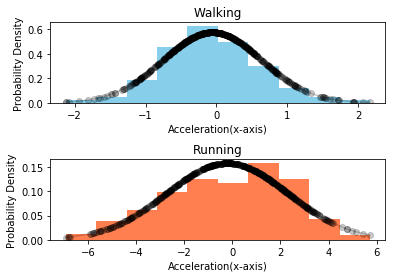

In [32]:
import numpy as np
import scipy.stats as stats
import pylab as pl
import matplotlib.pyplot as plt

pl.subplot(2,1,1)
sort_x_walk = sorted(x_walk)  #sorted
fit = stats.norm.pdf(sort_x_walk, np.mean(sort_x_walk), np.std(sort_x_walk))  #this is a fitting indeed
pl.plot(sort_x_walk,fit,'-o',color='black',alpha=0.2)
pl.xlabel('Acceleration(x-axis)')
pl.ylabel('Probability Density')
pl.hist(sort_x_walk,normed=True,color='skyblue')#use this to draw histogram of your data
pl.title('Walking')

pl.subplot(2,1,2)
sort_x_run = sorted(x_run)  #sorted
fit = stats.norm.pdf(sort_x_run, np.mean(sort_x_run), np.std(sort_x_run))  #this is a fitting indeed
pl.plot(sort_x_run,fit,'-o',color='black',alpha=0.2)
pl.hist(sort_x_run,normed=True,color='coral')      #use this to draw histogram of your data
pl.xlabel('Acceleration(x-axis)')
pl.ylabel('Probability Density')
pl.title('Running')
pl.subplots_adjust(hspace=0.7)
pl.savefig("./../Data-Visualization/images/X-distributions.png",dpi=1000)

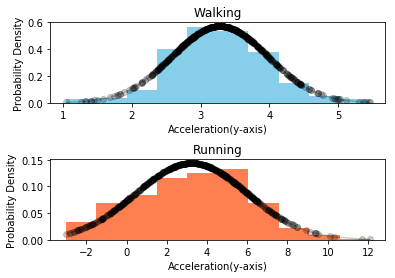

In [33]:
import numpy as np
import scipy.stats as stats
import pylab as pl
import matplotlib.pyplot as plt

pl.subplot(2,1,1)
sort_y_walk = sorted(y_walk)  #sorted
fit = stats.norm.pdf(sort_y_walk, np.mean(sort_y_walk), np.std(sort_y_walk))  #this is a fitting indeed
pl.plot(sort_y_walk,fit,'-o',color='black',alpha=0.2)
pl.xlabel('Acceleration(y-axis)')
pl.ylabel('Probability Density')
pl.title('Walking')
pl.hist(sort_y_walk,normed=True,color='skyblue')#use this to draw histogram of your data

pl.subplot(2,1,2)
sort_y_run = sorted(y_run)  #sorted
fit = stats.norm.pdf(sort_y_run, np.mean(sort_y_run), np.std(sort_y_run))  #this is a fitting indeed
pl.plot(sort_y_run,fit,'-o',color='black',alpha=0.2)
pl.xlabel('Acceleration(y-axis)')
pl.ylabel('Probability Density')
pl.title('Running')
pl.hist(sort_y_run,normed=True,color='coral')      #use this to draw histogram of your data
pl.subplots_adjust(hspace=0.7)
pl.savefig("./../Data-Visualization/images/Y-distributions.png",dpi=1000)

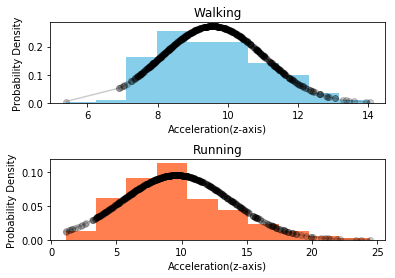

In [34]:
import numpy as np
import scipy.stats as stats
import pylab as pl
import matplotlib.pyplot as plt

pl.subplot(2,1,1)
sort_z_walk = sorted(z_walk)  #sorted
fit = stats.norm.pdf(sort_z_walk, np.mean(sort_z_walk), np.std(sort_z_walk))  #this is a fitting indeed
pl.plot(sort_z_walk,fit,'-o',color='black',alpha=0.2)
pl.xlabel('Acceleration(z-axis)')
pl.ylabel('Probability Density')
pl.title('Walking')
pl.hist(sort_z_walk,normed=True,color='skyblue')#use this to draw histogram of your data

pl.subplot(2,1,2)
sort_z_run = sorted(z_run)  #sorted
fit = stats.norm.pdf(sort_z_run, np.mean(sort_z_run), np.std(sort_z_run))  #this is a fitting indeed
pl.plot(sort_z_run,fit,'-o',color='black',alpha=0.2)
pl.xlabel('Acceleration(z-axis)')
pl.ylabel('Probability Density')
pl.title('Running')
pl.hist(sort_z_run,normed=True,color='coral')      #use this to draw histogram of your data
pl.subplots_adjust(hspace=0.7)
pl.savefig("./../Data-Visualization/images/Z-distributions.png",dpi=1000)